This example peeks under the hood and unearths the unspoken truth about Python 
lists ... drum roll ... they are in fact implemented as dynamic arrays.

In this example an empty list is created and items are repeated added. The 
system getsizeof tool is used to indetify the memory allocated to the list after
each addition which shows the arrays is resizing and shows its resizing scheme.

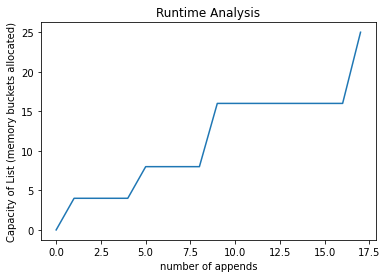

In [17]:

import sys
import time 
import matplotlib.pyplot as plt 
from numpy import median

maxN = 18

baseSize = sys.getsizeof([])
data = []
x,y = list(), list()
for k in range(maxN):
      x.append(k)                 # record the end time (in seconds)
      y.append((sys.getsizeof(data)-baseSize)//8)  # 8 bytes
      start = time.perf_counter()                 # record the start time (in seconds)
      data.append(k)
      end = time.perf_counter()  
            # compute average per operation
 


plt.plot(x, y) 
plt.title('Runtime Analysis')
plt.xlabel('number of appends')
plt.ylabel('Capacity of List (memory buckets allocated)')
plt.show() 

OK ... But why do we care?

The example below compares static allocation vs dynamic allocation in Python.
We design this trial using the List Object in Python, which is implemented as
a dynamic array. We compare 1) dynamic array -- starting with an empty list and repeated adding to it 
relying on the dynamic resizing to accomodate the added items and 2) "pre-allocating"
the known max size of the array and simply inserting the items into the array. 

The trial shows that performance for pre-allocation is best when the max size is known. 

In [18]:
def compute_dynamic(n):
  '''dynamic allocation and resizing'''
  data = [] # start with empty list
  total =[]
  for i in range(9):   # given the short runtime we repeat the trial and take median time
      start = time.perf_counter() 
      for k in range(n):  # run trial and perform n appends
          data.append(k)
      end = time.perf_counter()
      total.append(end - start)                    
  return median(total)  

In [19]:
def compute_static(n):
  '''pre-allocation of all slots in array / list'''
  data = [None]*n   #  pre-allocate size of n
  total =[]
  for i in range(9): # given the short runtime we repeat the trial and take median time
      start = time.perf_counter() 
      for k in range(n):  # run trial and perform n inserts
        data[k]=k
      end = time.perf_counter()
      total.append(end - start)                   
  return median(total)   

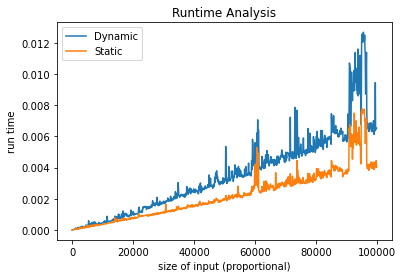

In [20]:
'''
main method: run trial for different inputs sizes n
'''
maxN = 100000  # max insertions to list to set termination condition
n = 2  # initialize number of insertions 
x,y_dyn,y_stat = list(), list(),list()
while n <= maxN:   
  x.append(n)
  y_dyn.append(compute_dynamic(n))
  y_stat.append(compute_static(n))
  n += 100
 
# display results
plt.plot(x, y_dyn, label = 'Dynamic') 
plt.plot(x, y_stat, label = 'Static') 
plt.legend(frameon = 'none')
plt.title('Runtime Analysis')
plt.xlabel('size of input (proportional)')
plt.ylabel('run time')
plt.show() 